In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# Dataset prepare

In [25]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=3)

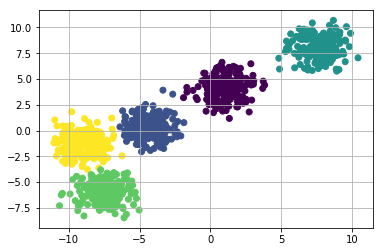

In [26]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# Making clusters

In [27]:
k  =5

color = ['green', 'red', 'blue', 'yellow', 'gray']
clusters = {}

for kx in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color':color[kx]
    }
    
    clusters[kx] = cluster

In [28]:
def dis(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [29]:
#Assign every data point to one of the clusters
def AssignPointToClusters(clusters):
    
    for ix in range(X.shape[0]):
        dist =[]
        
        for kx in range(k):
            d = dis(X[ix],clusters[kx]['center'])
            dist.append(d)
            
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(X[ix])
        

In [30]:
def  UpdateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_mean = pts.mean(axis=0)
            clusters[kx]['center'] = new_mean
            #clraring all points
            clusters[kx]['points'] = []

In [31]:
def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #plot the cluster center
        cc = clusters[kx]['center']
        plt.scatter(cc[0], cc[1], color='black', marker="*")
    

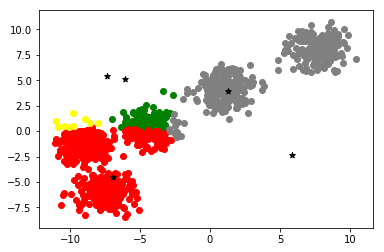

In [32]:
AssignPointToClusters(clusters)
plotClusters(clusters)

In [33]:
#Repeat the process of Assign and update until convergence

count  = 1
while True:
    AssignPointToClusters(clusters)
    UpdateClusters(clusters)
    count+=1
    if count>2000:
        break

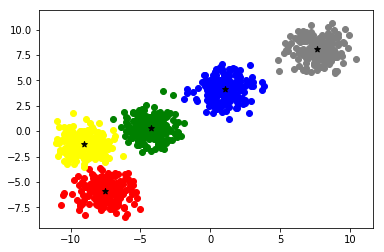

In [34]:
AssignPointToClusters(clusters)
plotClusters(clusters)
UpdateClusters(clusters)